<a href="https://colab.research.google.com/github/nayana142/Regression_Using_PyTorch/blob/main/california_houseprice_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## About this file
1. longitude: A measure of how far west a house is; a higher value is farther west
2. latitude: A measure of how far north a house is; a higher value is farther north
3. housingMedianAge: Median age of a house within a block; a lower number is a newer building
4. totalRooms: Total number of rooms within a block
5. totalBedrooms: Total number of bedrooms within a block
6. population: Total number of people residing within a block
7. households: Total number of households, a group of people residing within a home unit, for a block
8. medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
9. medianHouseValue: Median house value for households within a block (measured in US Dollars)
10. oceanProximity: Location of the house w.r.t ocean/sea

In [ ]:
data=pd.read_csv('/housing.csv')

In [ ]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


# Data Exploratory Analysis

In [ ]:
data.shape

(20640, 10)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


In [ ]:
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

* There is null values in column total_bedrooms

In [ ]:
data.dropna(inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [ ]:
for i in data.columns:
    print(i,data[i].nunique())

longitude 844
latitude 862
housing_median_age 52
total_rooms 5926
total_bedrooms 1923
population 3888
households 1815
median_income 12928
median_house_value 3842
ocean_proximity 5


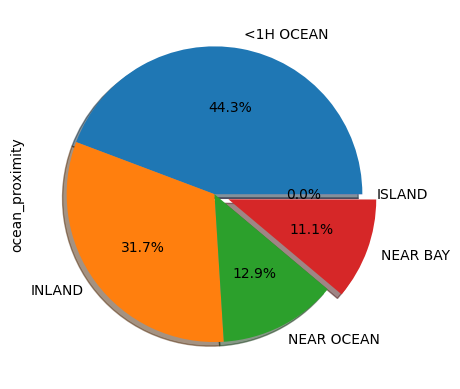

In [ ]:
data.ocean_proximity.value_counts().plot(kind='pie',shadow=True,autopct='%1.1f%%',explode=(0,0,0,0.1,0))
plt.show()

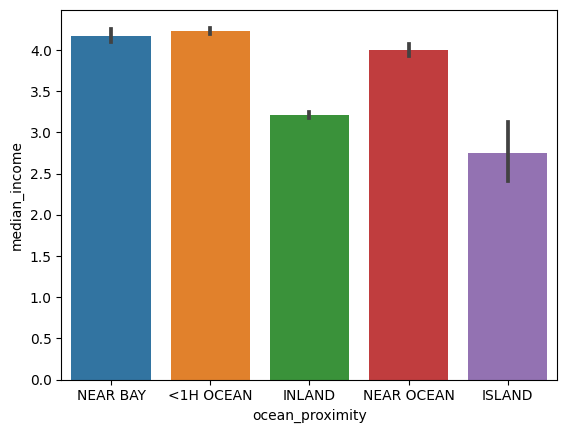

In [ ]:
sns.barplot(data=data,x='ocean_proximity',y='median_income')
plt.show()

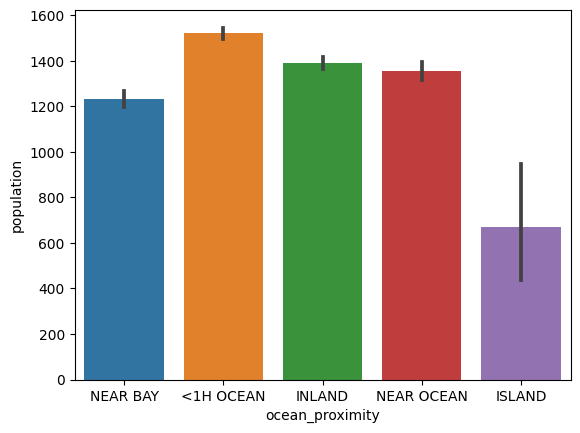

In [ ]:
sns.barplot(data=data,x='ocean_proximity',y='population')
plt.show()

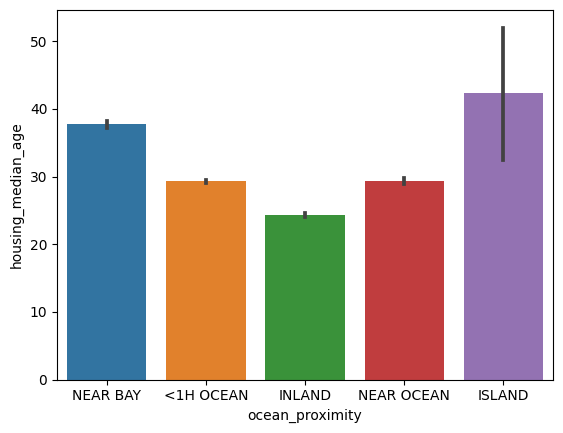

In [ ]:
sns.barplot(data=data,y='housing_median_age',x='ocean_proximity')
plt.show()

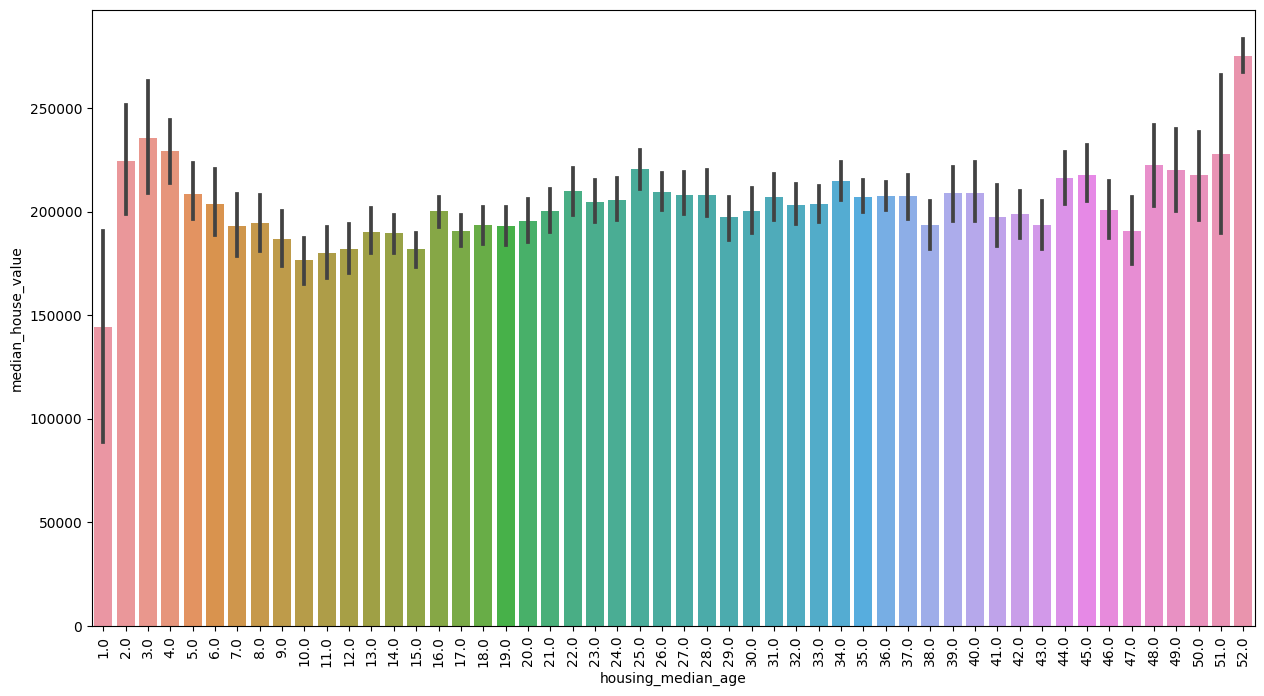

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(data=data,x='housing_median_age',y='median_house_value')
plt.xticks(rotation=90)
plt.show()


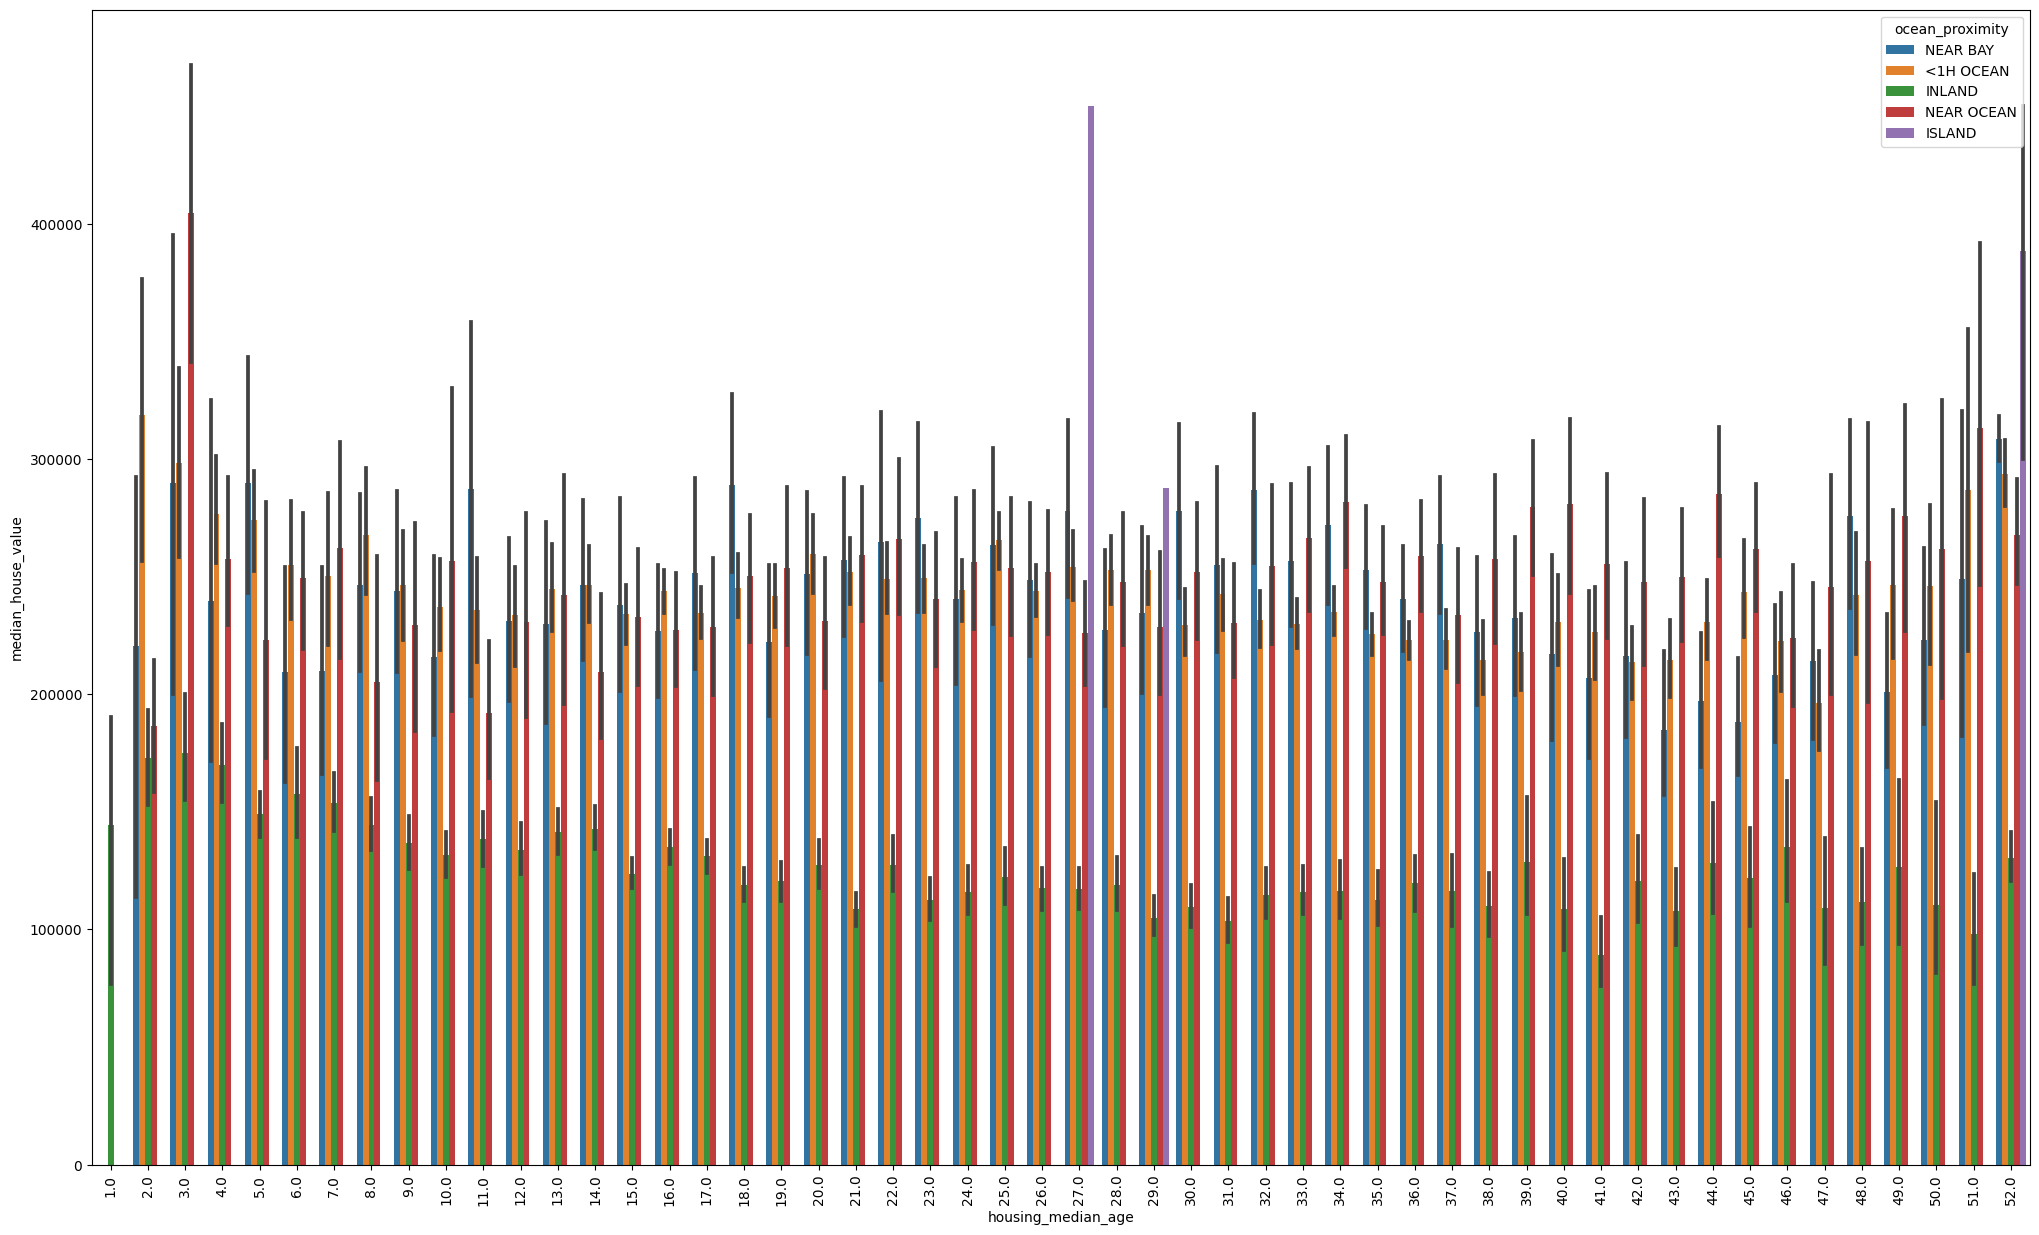

In [ ]:
plt.figure(figsize=(25,15))
sns.barplot(data=data,x='housing_median_age',y='median_house_value',hue='ocean_proximity')
plt.xticks(rotation=90)
plt.show()

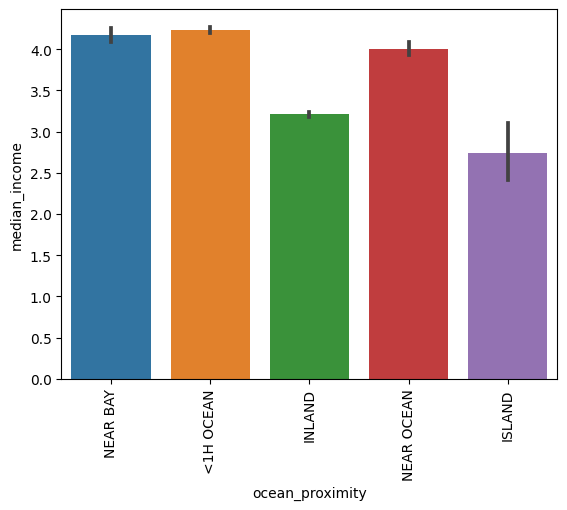

In [ ]:
sns.barplot(data=data,y='median_income',x='ocean_proximity')
plt.xticks(rotation=90)
plt.show()

<Axes: ylabel='Density'>

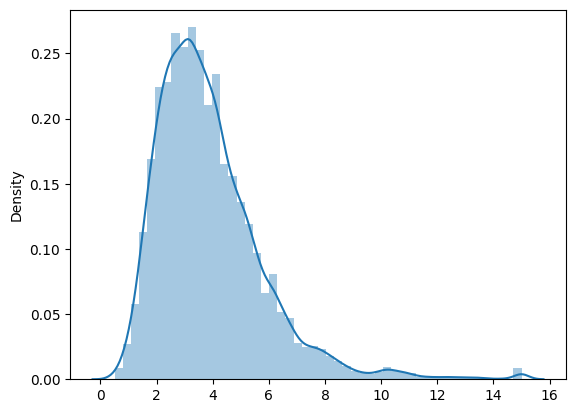

In [ ]:
sns.distplot(x=data['median_income'])

<Axes: ylabel='Density'>

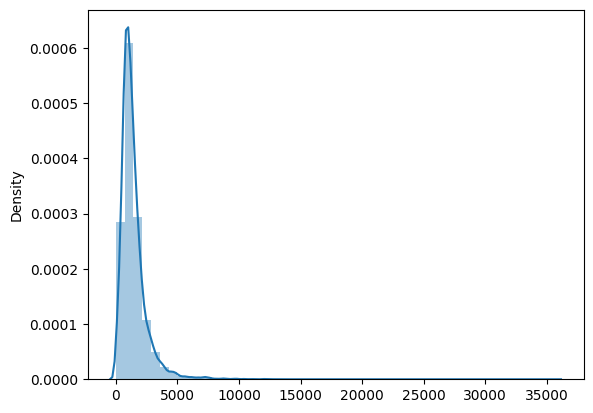

In [ ]:
sns.distplot(x=data['population'])

<Axes: ylabel='Density'>

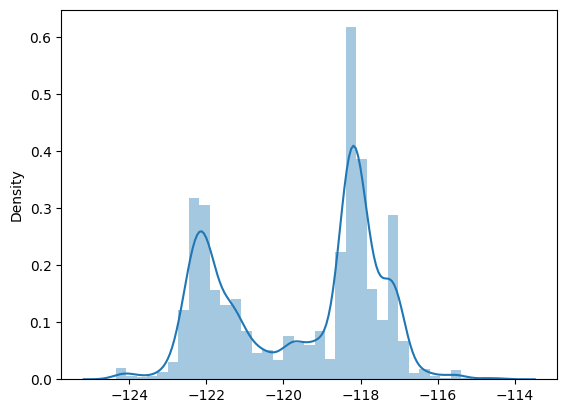

In [ ]:
sns.distplot(x=data['longitude'])

<Axes: ylabel='Density'>

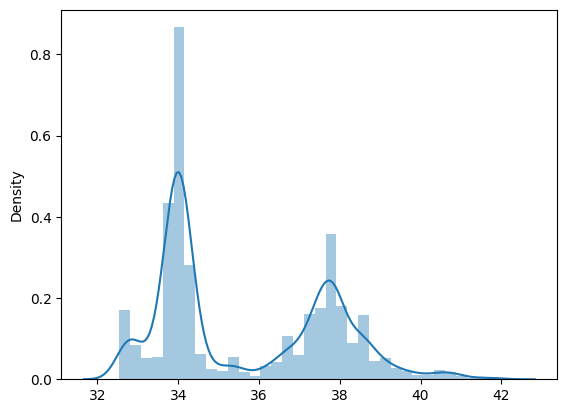

In [ ]:
sns.distplot(x=data['latitude'])

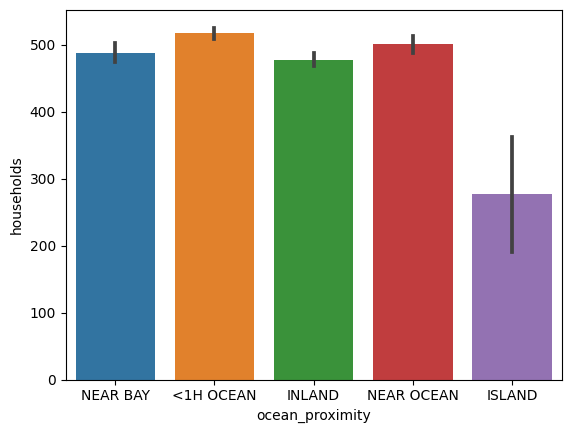

In [ ]:
sns.barplot(data=data,y='households',x='ocean_proximity')
plt.show()

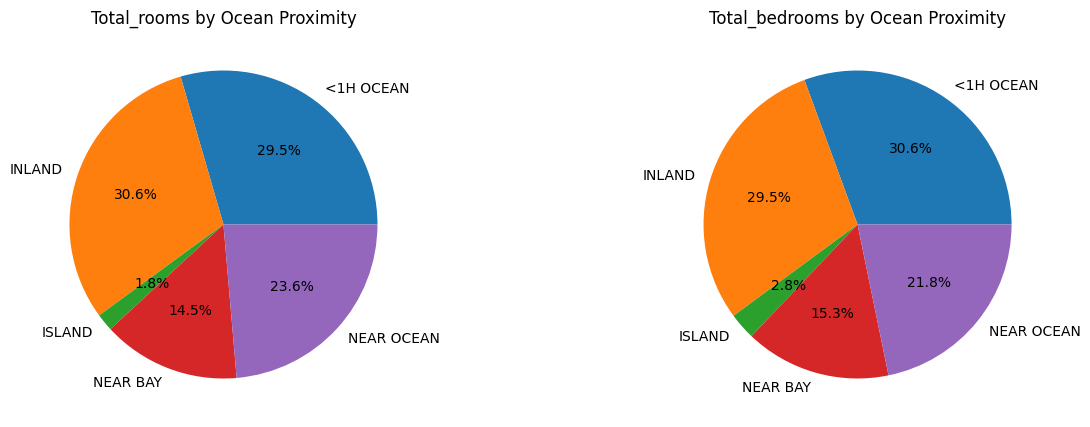

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Group by 'ocean_proximity' and plot pie charts for each column
for i, col in enumerate(['total_rooms', 'total_bedrooms']):
    data.groupby('ocean_proximity')[col].max().plot(kind='pie', ax=axes[i], autopct='%1.1f%%')
    axes[i].set_title(f'{col.capitalize()} by Ocean Proximity')
    axes[i].set_ylabel('')  # Remove y-label for cleaner presentation


## Outlier Detection

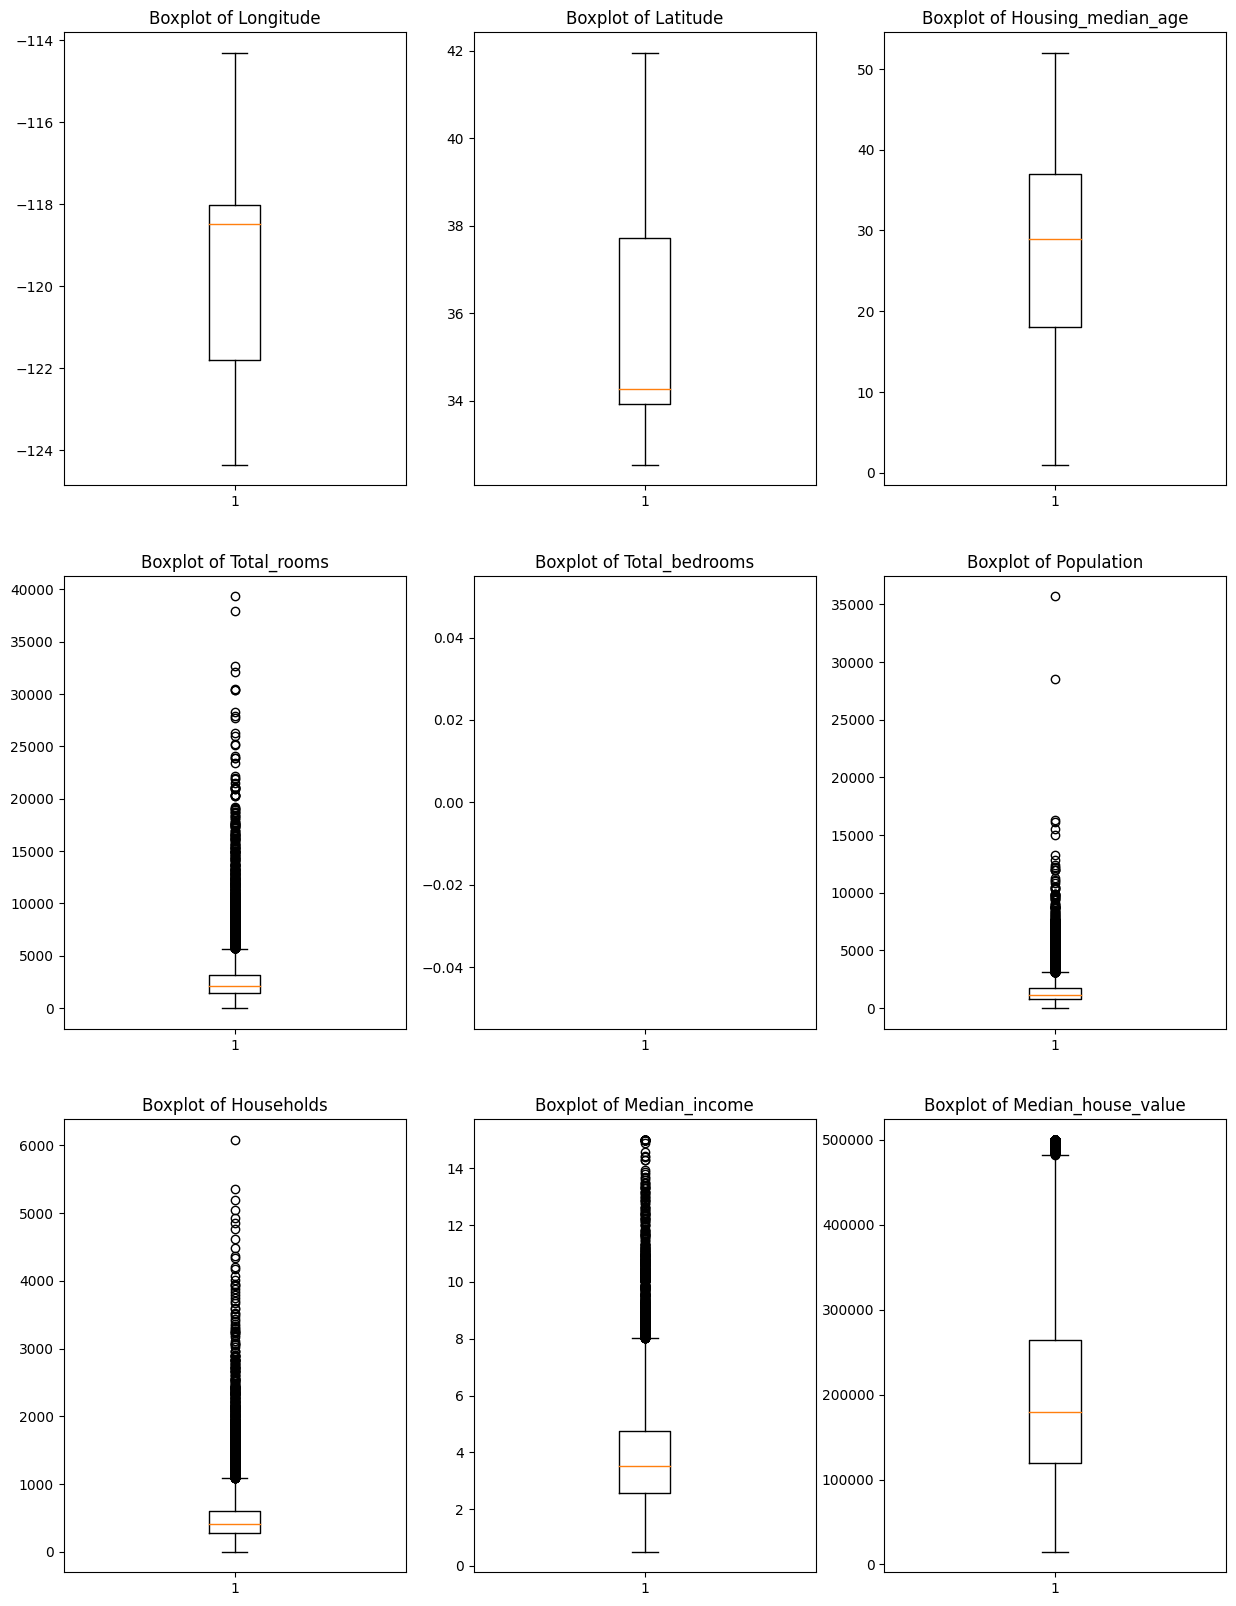

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(15, 20))  # Creating a 5x2 grid of subplots

# Flatten the axes array to iterate over each subplot
axes = axes.flatten()

# Plot boxplots for each column
for i, col in enumerate(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value']):
    axes[i].boxplot(data[col], vert=True)
    axes[i].set_title(f'Boxplot of {col.capitalize()}')
    axes[i].set_ylabel('')  # Remove y-label for cleaner presentation



In [ ]:
# Function to remove outliers based on IQR
def remove_outliers(data):
    cleaned_data = pd.DataFrame()
    for col in data.columns:
        if data[col].dtype in ['int64', 'float64']:  # Checking numerical columns
            Q1 = data[col].quantile(0.25)
            Q3 = data[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            cleaned_data[col] = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)][col]
        else:
            cleaned_data[col] = data[col]  # Non-numeric columns remain unchanged
    return cleaned_data

# Applying outlier removal function to the entire dataset
cleaned_data = remove_outliers(data)

In [ ]:
cleaned_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,NaN,452600.0,NEAR BAY
1,-122.22,37.86,21.0,NaN,1106.0,2401.0,NaN,NaN,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


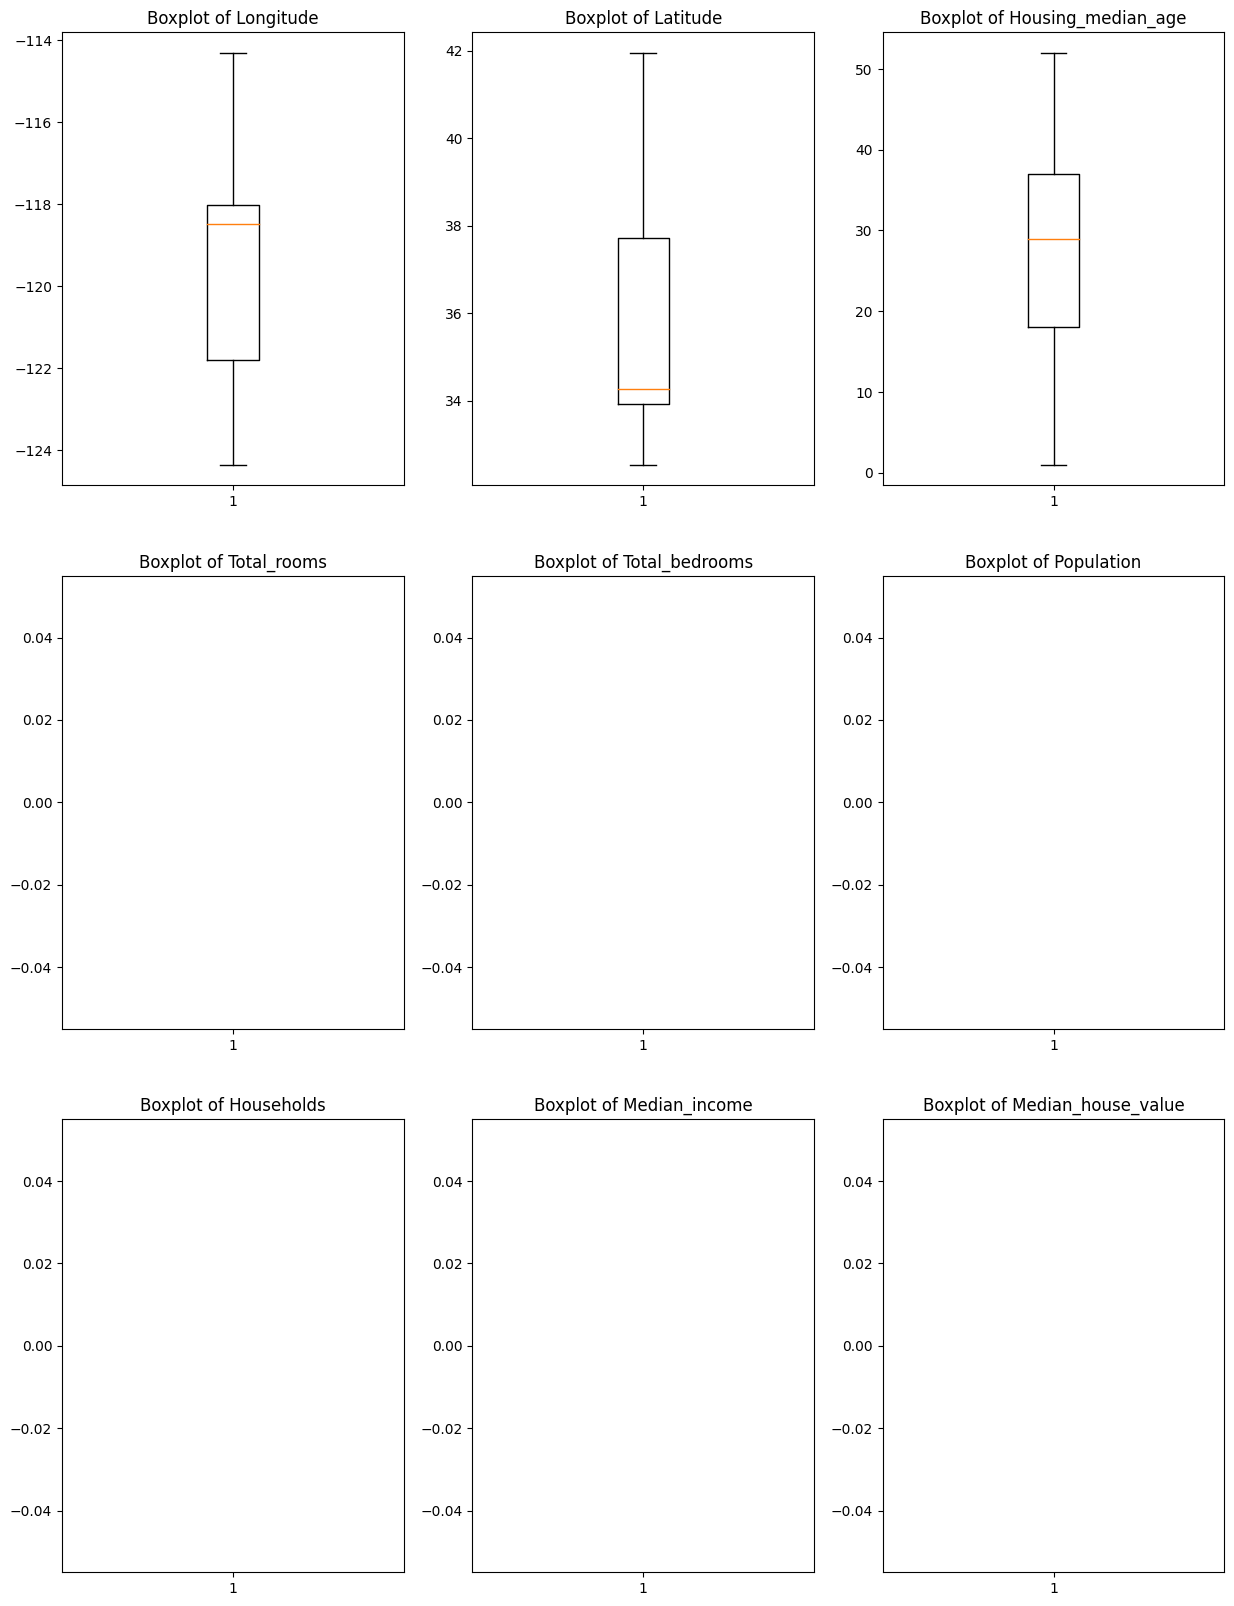

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(15, 20))  # Creating a 5x2 grid of subplots

# Flatten the axes array to iterate over each subplot
axes = axes.flatten()

# Plot boxplots for each column
for i, col in enumerate(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value']):
    axes[i].boxplot(cleaned_data[col], vert=True)
    axes[i].set_title(f'Boxplot of {col.capitalize()}')
    axes[i].set_ylabel('')  # Remove y-label for cleaner presentation



In [ ]:
cleaned_data.isnull().sum()

longitude                0
latitude                 0
housing_median_age       0
total_rooms           1287
total_bedrooms        1478
population            1196
households            1220
median_income          681
median_house_value    1071
ocean_proximity          0
dtype: int64

In [ ]:
data1=cleaned_data.copy()

In [ ]:
data1.dropna(inplace=True)

In [ ]:
data1

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [ ]:
data1.groupby('ocean_proximity')['housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households',
       'median_house_value'].max()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_house_value
ocean_proximity,,,,,,
<1H OCEAN,52.0,5688.0,1171.0,3130.0,1092.0,481500.0
INLAND,52.0,5684.0,1172.0,3131.0,1088.0,476700.0
ISLAND,52.0,2359.0,591.0,1100.0,431.0,450000.0
NEAR BAY,52.0,5688.0,1168.0,3124.0,1086.0,478600.0
NEAR OCEAN,52.0,5694.0,1173.0,3129.0,1081.0,482200.0


In [ ]:
data1.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [ ]:
data1

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


# Label encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
data1['ocean_proximity']=lb.fit_transform(data1['ocean_proximity'])

In [ ]:
data1

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,3
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,3
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,1
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,1
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,1
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,1


## Model Building

In [ ]:
x=data1.drop(columns='median_house_value').values
x

array([[-122.24  ,   37.85  ,   52.    , ...,  177.    ,    7.2574,
           3.    ],
       [-122.25  ,   37.85  ,   52.    , ...,  219.    ,    5.6431,
           3.    ],
       [-122.25  ,   37.85  ,   52.    , ...,  259.    ,    3.8462,
           3.    ],
       ...,
       [-121.22  ,   39.43  ,   17.    , ...,  433.    ,    1.7   ,
           1.    ],
       [-121.32  ,   39.43  ,   18.    , ...,  349.    ,    1.8672,
           1.    ],
       [-121.24  ,   39.37  ,   16.    , ...,  530.    ,    2.3886,
           1.    ]])

In [ ]:
y=data1['median_house_value'].values
y

array([352100., 341300., 342200., ...,  92300.,  84700.,  89400.])

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [ ]:
## Libraries From Pytorch
import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
x_train=torch.FloatTensor(x_train)
x_test=torch.FloatTensor(x_test)
y_train=torch.FloatTensor(y_train)
y_test=torch.FloatTensor(y_test)

In [ ]:
class House_prediction(nn.Module):
    def __init__(self,input_feature=9,hidden_layer1=20,hidden_layer2=20,output_feature=1):
        super(House_prediction,self).__init__()
        self.fc1=nn.Linear(input_feature,hidden_layer1)
        self.relu=nn.ReLU()
        self.fc2=nn.Linear(hidden_layer1,hidden_layer2)
        self.relu2=nn.ReLU()
        self.fc3=nn.Linear(hidden_layer2,output_feature)

    def forward(self,x):
        x=self.fc1(x)
        x=self.relu(x)
        x=self.fc2(x)
        x=self.relu(x)
        x=self.fc3(x)
        return x

In [ ]:
model=House_prediction()

In [ ]:
model.parameters

<bound method Module.parameters of House_prediction(
  (fc1): Linear(in_features=9, out_features=20, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=20, out_features=20, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=20, out_features=1, bias=True)
)>

In [ ]:
import torch.optim as optim
criterion = nn.MSELoss()  # Mean Squared Error loss for regression
optimizer = optim.Adam(model.parameters(), lr=0.01)  # Adam optimizer


In [54]:
epochs=500
final_losses=[]
for i in range(epochs):
    i=i+1
    y_pred=model.forward(x_train)
    loss=criterion(y_pred,y_train)
    final_losses.append(loss)
    if i%10==1:
        print("Epoch number: {} and the loss : {}".format(i,loss.item()))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch number: 1 and the loss : 43652132864.0
Epoch number: 11 and the loss : 43651067904.0
Epoch number: 21 and the loss : 43647533056.0
Epoch number: 31 and the loss : 43638247424.0
Epoch number: 41 and the loss : 43618066432.0
Epoch number: 51 and the loss : 43579895808.0
Epoch number: 61 and the loss : 43514900480.0
Epoch number: 71 and the loss : 43412590592.0
Epoch number: 81 and the loss : 43260506112.0
Epoch number: 91 and the loss : 43045535744.0
Epoch number: 101 and the loss : 42754412544.0
Epoch number: 111 and the loss : 42374180864.0
Epoch number: 121 and the loss : 41892737024.0
Epoch number: 131 and the loss : 41299234816.0
Epoch number: 141 and the loss : 40584593408.0
Epoch number: 151 and the loss : 39741968384.0
Epoch number: 161 and the loss : 38767276032.0
Epoch number: 171 and the loss : 37659648000.0
Epoch number: 181 and the loss : 36421869568.0
Epoch number: 191 and the loss : 35060727808.0
Epoch number: 201 and the loss : 33587294208.0
Epoch number: 211 and th

In [55]:
%matplotlib inline

Text(0.5, 0, 'Epoch')

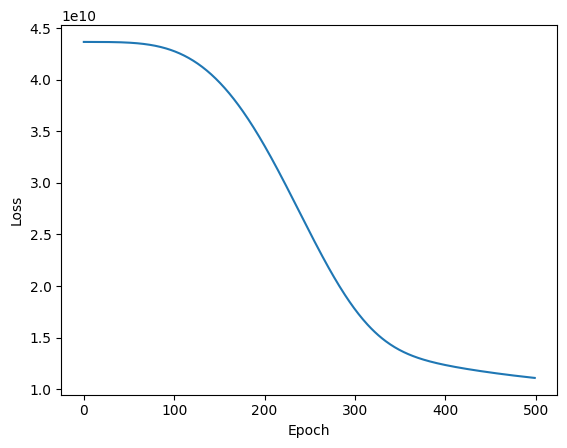

In [56]:
plt.plot(range(epochs), [loss.item() for loss in final_losses])
plt.ylabel('Loss')
plt.xlabel('Epoch')

In [58]:
model.eval()
with torch.no_grad():
    y_pred = model(x_test)
    test_loss = criterion(y_pred, y_test.view(-1, 1))
    print(f'Test Loss: {test_loss.item():.4f}')

Test Loss: 10291435520.0000
